In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
from pandas.tseries.offsets import BDay

%matplotlib inline

plt.style.use('bmh')

In [2]:
def create_monthly(df, name):
    period = df.index.to_period('M')
    months = np.asarray(period.unique())
    monthly_avg = np.zeros(len(months))

    for t in range(len(months)):
        if t == 0:
            monthly_avg[t] = np.average(df.iloc[np.where(period < months[t + 1])[0]])
        elif t < len(months) - 1:
            monthly_avg[t] = np.average(df.iloc[np.where((period < months[t + 1])& (period >= months[t]))[0]])
        else:
            monthly_avg[t] = np.average(df.iloc[np.where(period >= months[t])[0]])
    
    months = months + 1
    df_monthly = pd.DataFrame(data = {'{}'.format(name): monthly_avg}, index = months)
    df_monthly.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/{}_monthly.csv'.format(name))
    return print('Monthly summation was successful! {}_monthly.csv saved'.format(name))

def create_plot(series, name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(name)

    sns.lineplot(ax = ax[0], x = series.index, y = series.values, color = 'b')
    ax[0].set_title("Time series's of data")
    ax[0].set_xlabel('Date')

    sns.distplot(series, color='g', bins=100, hist_kws={'alpha': 0.4}, ax = ax[1])
    ax[1].set_title("Histogram's of data")
    return

def read_data(name, plot = True):
    df = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/{}.csv'.format(name))
    df.set_index(pd.to_datetime(df.iloc[:, 0]), inplace = True)
    df = df.iloc[:, 1]
    if plot == True:
        create_plot(df, name)
    return df

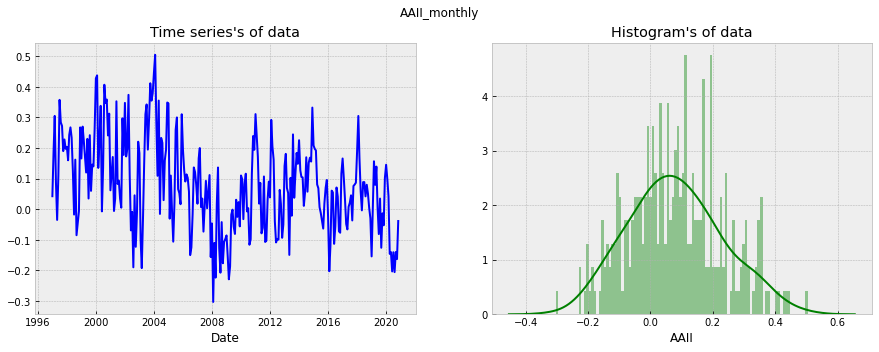

In [3]:
aaii_monthly = read_data('AAII_monthly', plot = False)
aaii_monthly = aaii_monthly[(aaii_monthly.index >= datetime(1997, 1, 1)) & (aaii_monthly.index <= datetime(2020, 11, 1))]
create_plot(aaii_monthly, 'AAII_monthly')

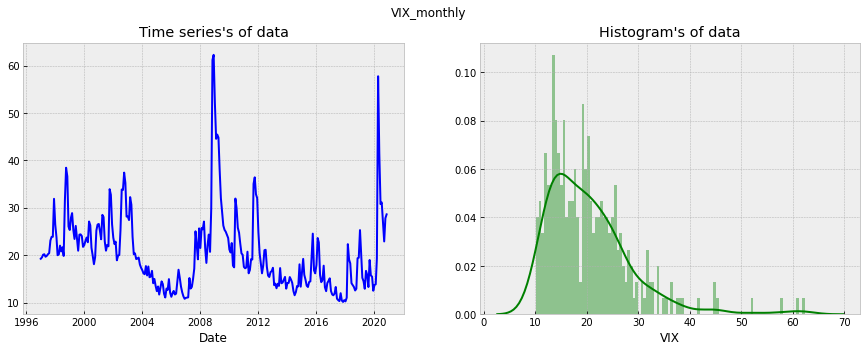

In [4]:
vix_monthly = read_data('VIX_monthly', plot = False)
vix_monthly = vix_monthly[(vix_monthly.index >= datetime(1997, 1, 1)) & (vix_monthly.index <= datetime(2020, 11, 1))]
create_plot(vix_monthly, 'VIX_monthly')

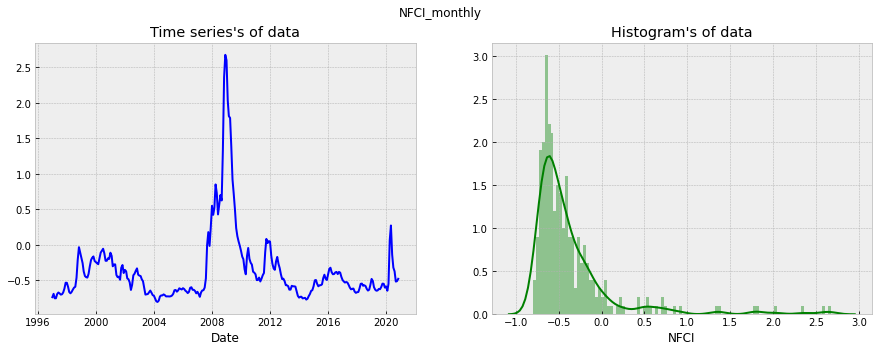

In [5]:
nfci_monthly = read_data('NFCI_monthly', plot = False)
nfci_monthly = nfci_monthly[(nfci_monthly.index >= datetime(1997, 1, 1)) & (nfci_monthly.index <= datetime(2020, 11, 1))]
create_plot(nfci_monthly, 'NFCI_monthly')

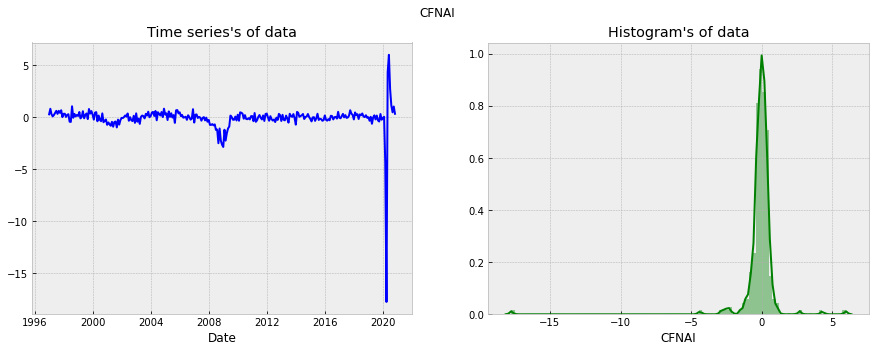

In [6]:
nai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
nai.set_index(pd.to_datetime(nai.DATE), inplace = True)
nai = nai.iloc[:, 1]
nai = nai[(nai.index >= datetime(1997, 1, 1)) & (nai.index <= datetime(2020, 11, 1))]
create_plot(nai, 'CFNAI')

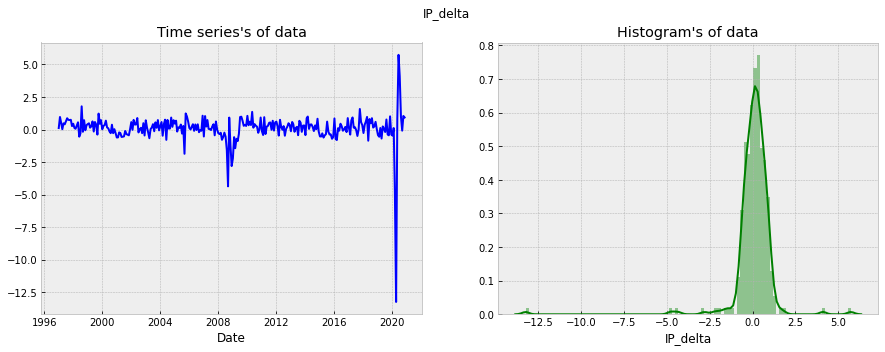

In [7]:
ip = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/INDPRO.csv')
ip.set_index(pd.to_datetime(ip.DATE), inplace = True)
ip['IP_delta'] = ip.INDPRO.diff()
ip = ip.iloc[:, 2]
ip = ip[(ip.index >= datetime(1997, 1, 1)) & (ip.index <= datetime(2020, 11, 1))]
create_plot(ip, 'IP_delta')

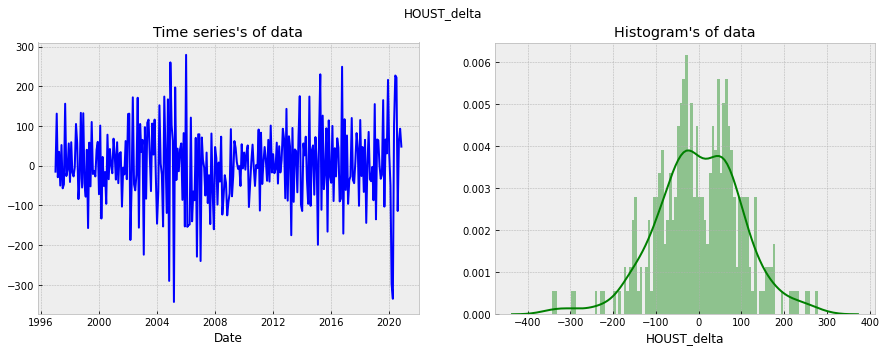

In [8]:
houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
houst.set_index(pd.to_datetime(houst.DATE), inplace = True)
houst['HOUST_delta'] = houst.HOUST.diff()
houst = houst.iloc[:, 2]
houst = houst[(houst.index >= datetime(1997, 1, 1)) & (houst.index <= datetime(2020, 11, 1))]
create_plot(houst, 'HOUST_delta')

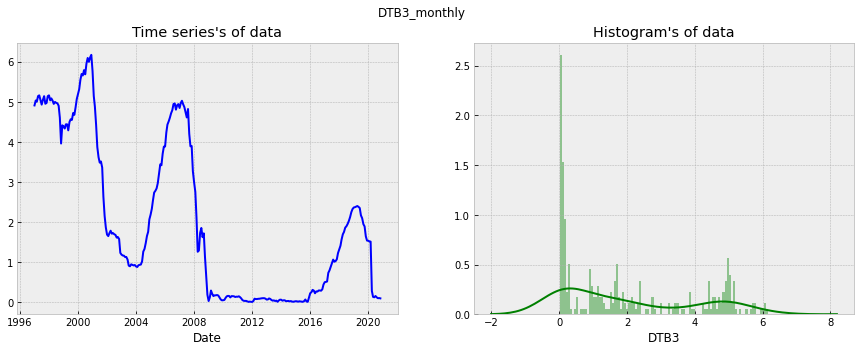

In [9]:
dtb_monthly = read_data('DTB3_monthly', plot = False)
dtb_monthly = dtb_monthly[(dtb_monthly.index >= datetime(1997, 1, 1)) & (dtb_monthly.index <= datetime(2020, 11, 1))]
create_plot(dtb_monthly, 'DTB3_monthly')

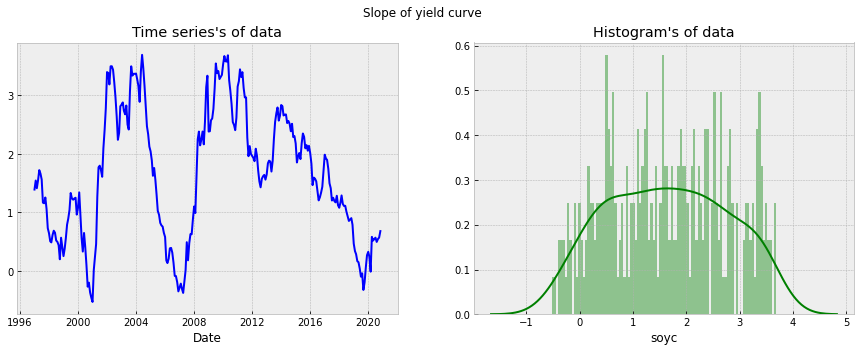

In [10]:
soyc = read_data('soyc_monthly', plot = False)
soyc = soyc[(soyc.index >= datetime(1997, 1, 1)) & (soyc.index <= datetime(2020, 11, 1))]
create_plot(soyc, 'Slope of yield curve')

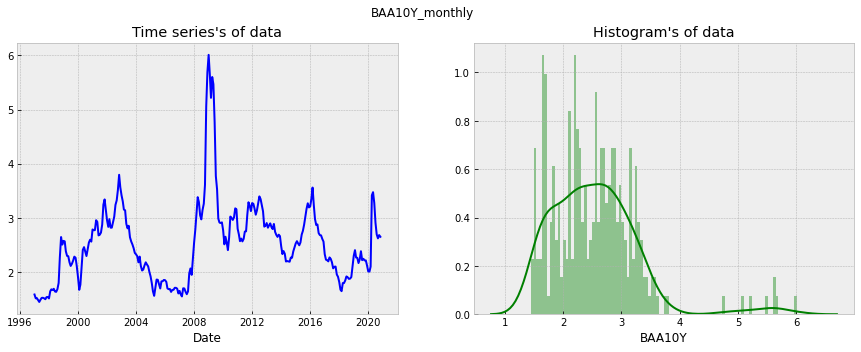

In [11]:
baa_monthly = read_data('BAA10Y_monthly', plot = False)
baa_monthly = baa_monthly[(baa_monthly.index >= datetime(1997, 1, 1)) & (baa_monthly.index <= datetime(2020, 11, 1))]
create_plot(baa_monthly, 'BAA10Y_monthly')

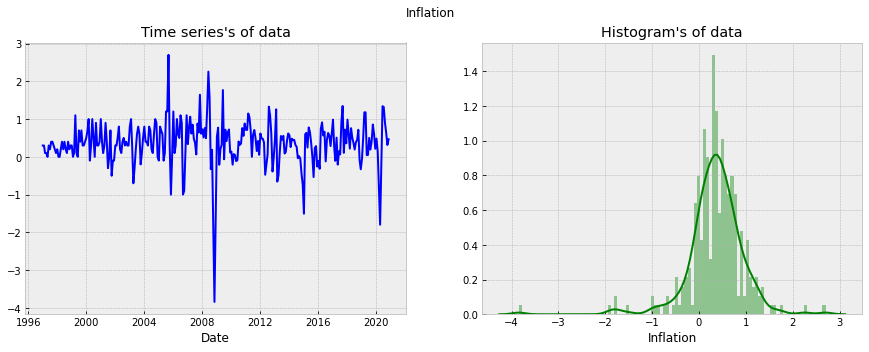

In [12]:
inf = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CPIAUCSL.csv')
inf.set_index(pd.to_datetime(inf.DATE), inplace = True)
inf['Inflation'] = inf.CPIAUCSL.diff()
inf = inf.iloc[1:, 2]
inf = inf[(inf.index >= datetime(1997, 1, 1)) & (inf.index <= datetime(2020, 11, 1))]
create_plot(inf, 'Inflation')

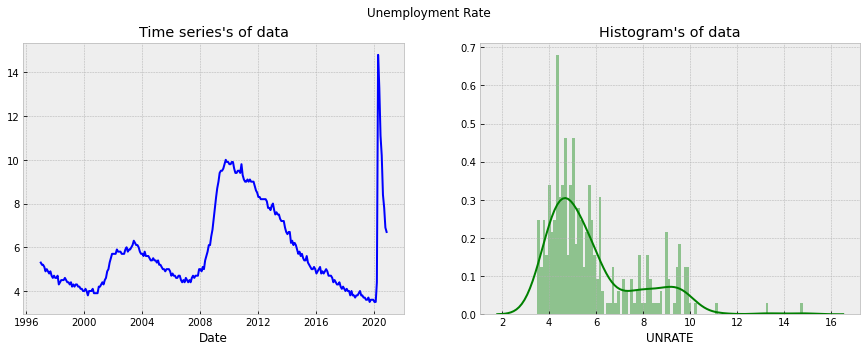

In [13]:
unr = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/UNRATE.csv')
unr.set_index(pd.to_datetime(unr.DATE), inplace = True)
unr = unr.iloc[:, 1]
unr = unr[(unr.index >= datetime(1997, 1, 1)) & (unr.index <= datetime(2020, 11, 1))]
create_plot(unr, 'Unemployment Rate')

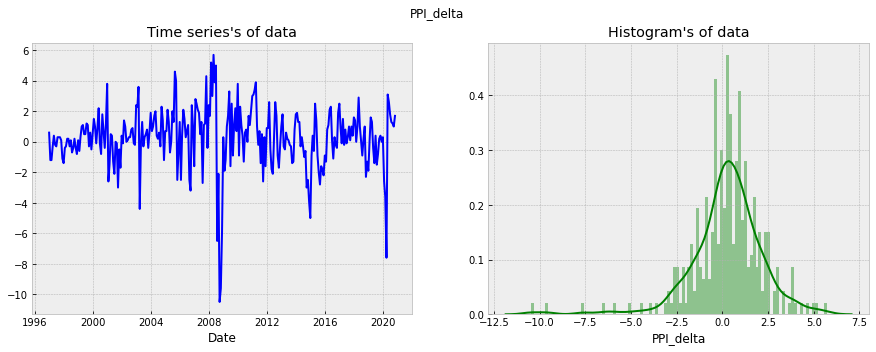

In [14]:
ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi.set_index(pd.to_datetime(ppi.DATE), inplace = True)
ppi['PPI_delta'] = ppi.PPIACO.diff()
ppi = ppi.iloc[1:, 2]
ppi = ppi[(ppi.index >= datetime(1997, 1, 1)) & (ppi.index <= datetime(2020, 11, 1))]
create_plot(ppi, 'PPI_delta')

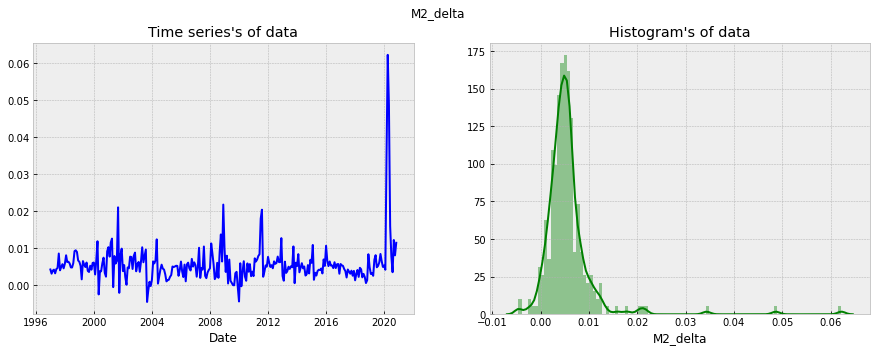

In [15]:
m2sl = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/M2SL.csv')
m2sl.set_index(pd.to_datetime(m2sl.DATE), inplace = True)
m2sl['M2_delta'] = np.log(m2sl.M2SL).diff()
m2sl = m2sl.iloc[1:, 2]
m2sl = m2sl[(m2sl.index >= datetime(1997, 1, 1)) & (m2sl.index <= datetime(2020, 11, 1))]
create_plot(m2sl, 'M2_delta')

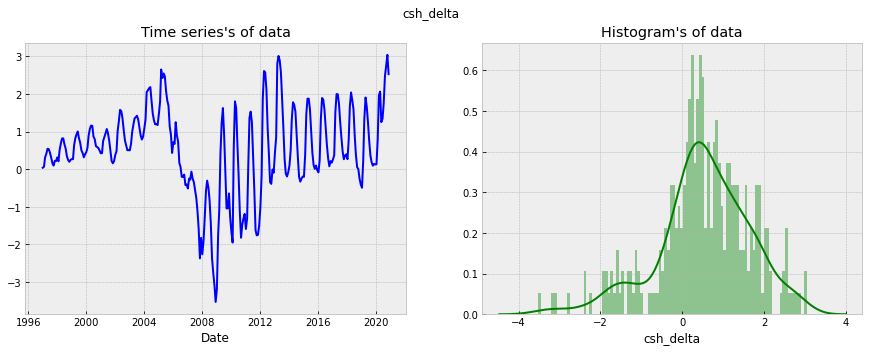

In [16]:
csh = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CSUSHPINSA.csv')
csh.set_index(pd.to_datetime(csh.DATE), inplace = True)
csh['csh_delta'] = csh.CSUSHPINSA.diff()
csh = csh.iloc[1:, 2]
csh = csh[(csh.index >= datetime(1997, 1, 1)) & (csh.index <= datetime(2020, 11, 1))]
create_plot(csh, 'csh_delta')

In [17]:
data = pd.concat([aaii_monthly, vix_monthly, nfci_monthly, nai, ip, houst, dtb_monthly, soyc, baa_monthly, inf, unr, ppi, m2sl, csh], axis = 1)

In [18]:
data

,AAII,VIX,NFCI,CFNAI,IP_delta,HOUST_delta,DTB3,soyc,BAA10Y,Inflation,UNRATE,PPI_delta,M2_delta,csh_delta
1997-01-01,0.042500,19.234545,-0.736012,0.26,0.1130,-15.0,4.910952,1.391429,1.588636,0.300,5.3,0.6,0.004181,0.040
1997-02-01,0.192000,19.536087,-0.689170,0.79,0.9657,131.0,5.033810,1.545238,1.518261,0.300,5.2,-1.2,0.003046,0.066
1997-03-01,0.305000,20.091500,-0.751732,0.28,0.5410,-29.0,5.005789,1.413684,1.522500,0.100,5.2,-1.2,0.003866,0.315
1997-04-01,0.087500,20.185714,-0.751430,0.06,0.0191,35.0,5.144000,1.550500,1.484762,0.100,5.1,-0.3,0.004135,0.409
1997-05-01,-0.035000,19.662273,-0.693043,0.19,0.4762,-50.0,5.162273,1.723182,1.451364,0.000,4.9,0.4,0.003142,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-0.140688,31.119545,-0.319640,2.69,4.1067,222.0,0.159545,0.569091,2.913182,1.322,10.2,1.8,0.007764,1.760
2020-08-01,-0.205616,26.876957,-0.372862,1.11,0.9799,-114.0,0.126818,0.496818,2.697391,0.907,8.4,1.3,0.003449,2.478
2020-09-01,-0.139910,22.889524,-0.516713,0.45,-0.0857,64.0,0.104286,0.545714,2.624286,0.638,7.8,1.2,0.012159,2.751
2020-10-01,-0.162961,27.788636,-0.510830,1.01,1.0416,93.0,0.108571,0.570952,2.684545,0.313,6.9,1.0,0.008007,3.040


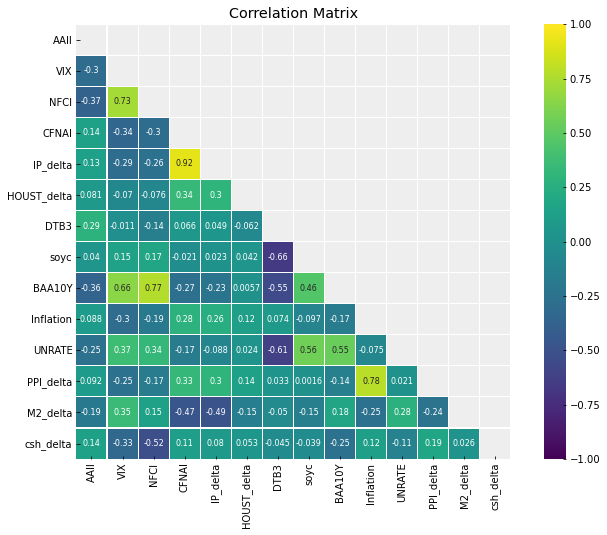

In [19]:
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(data.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True, mask = np.triu(data.corr()))
ax.set_title('Correlation Matrix')
plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/corr_mat.png')
plt.show()

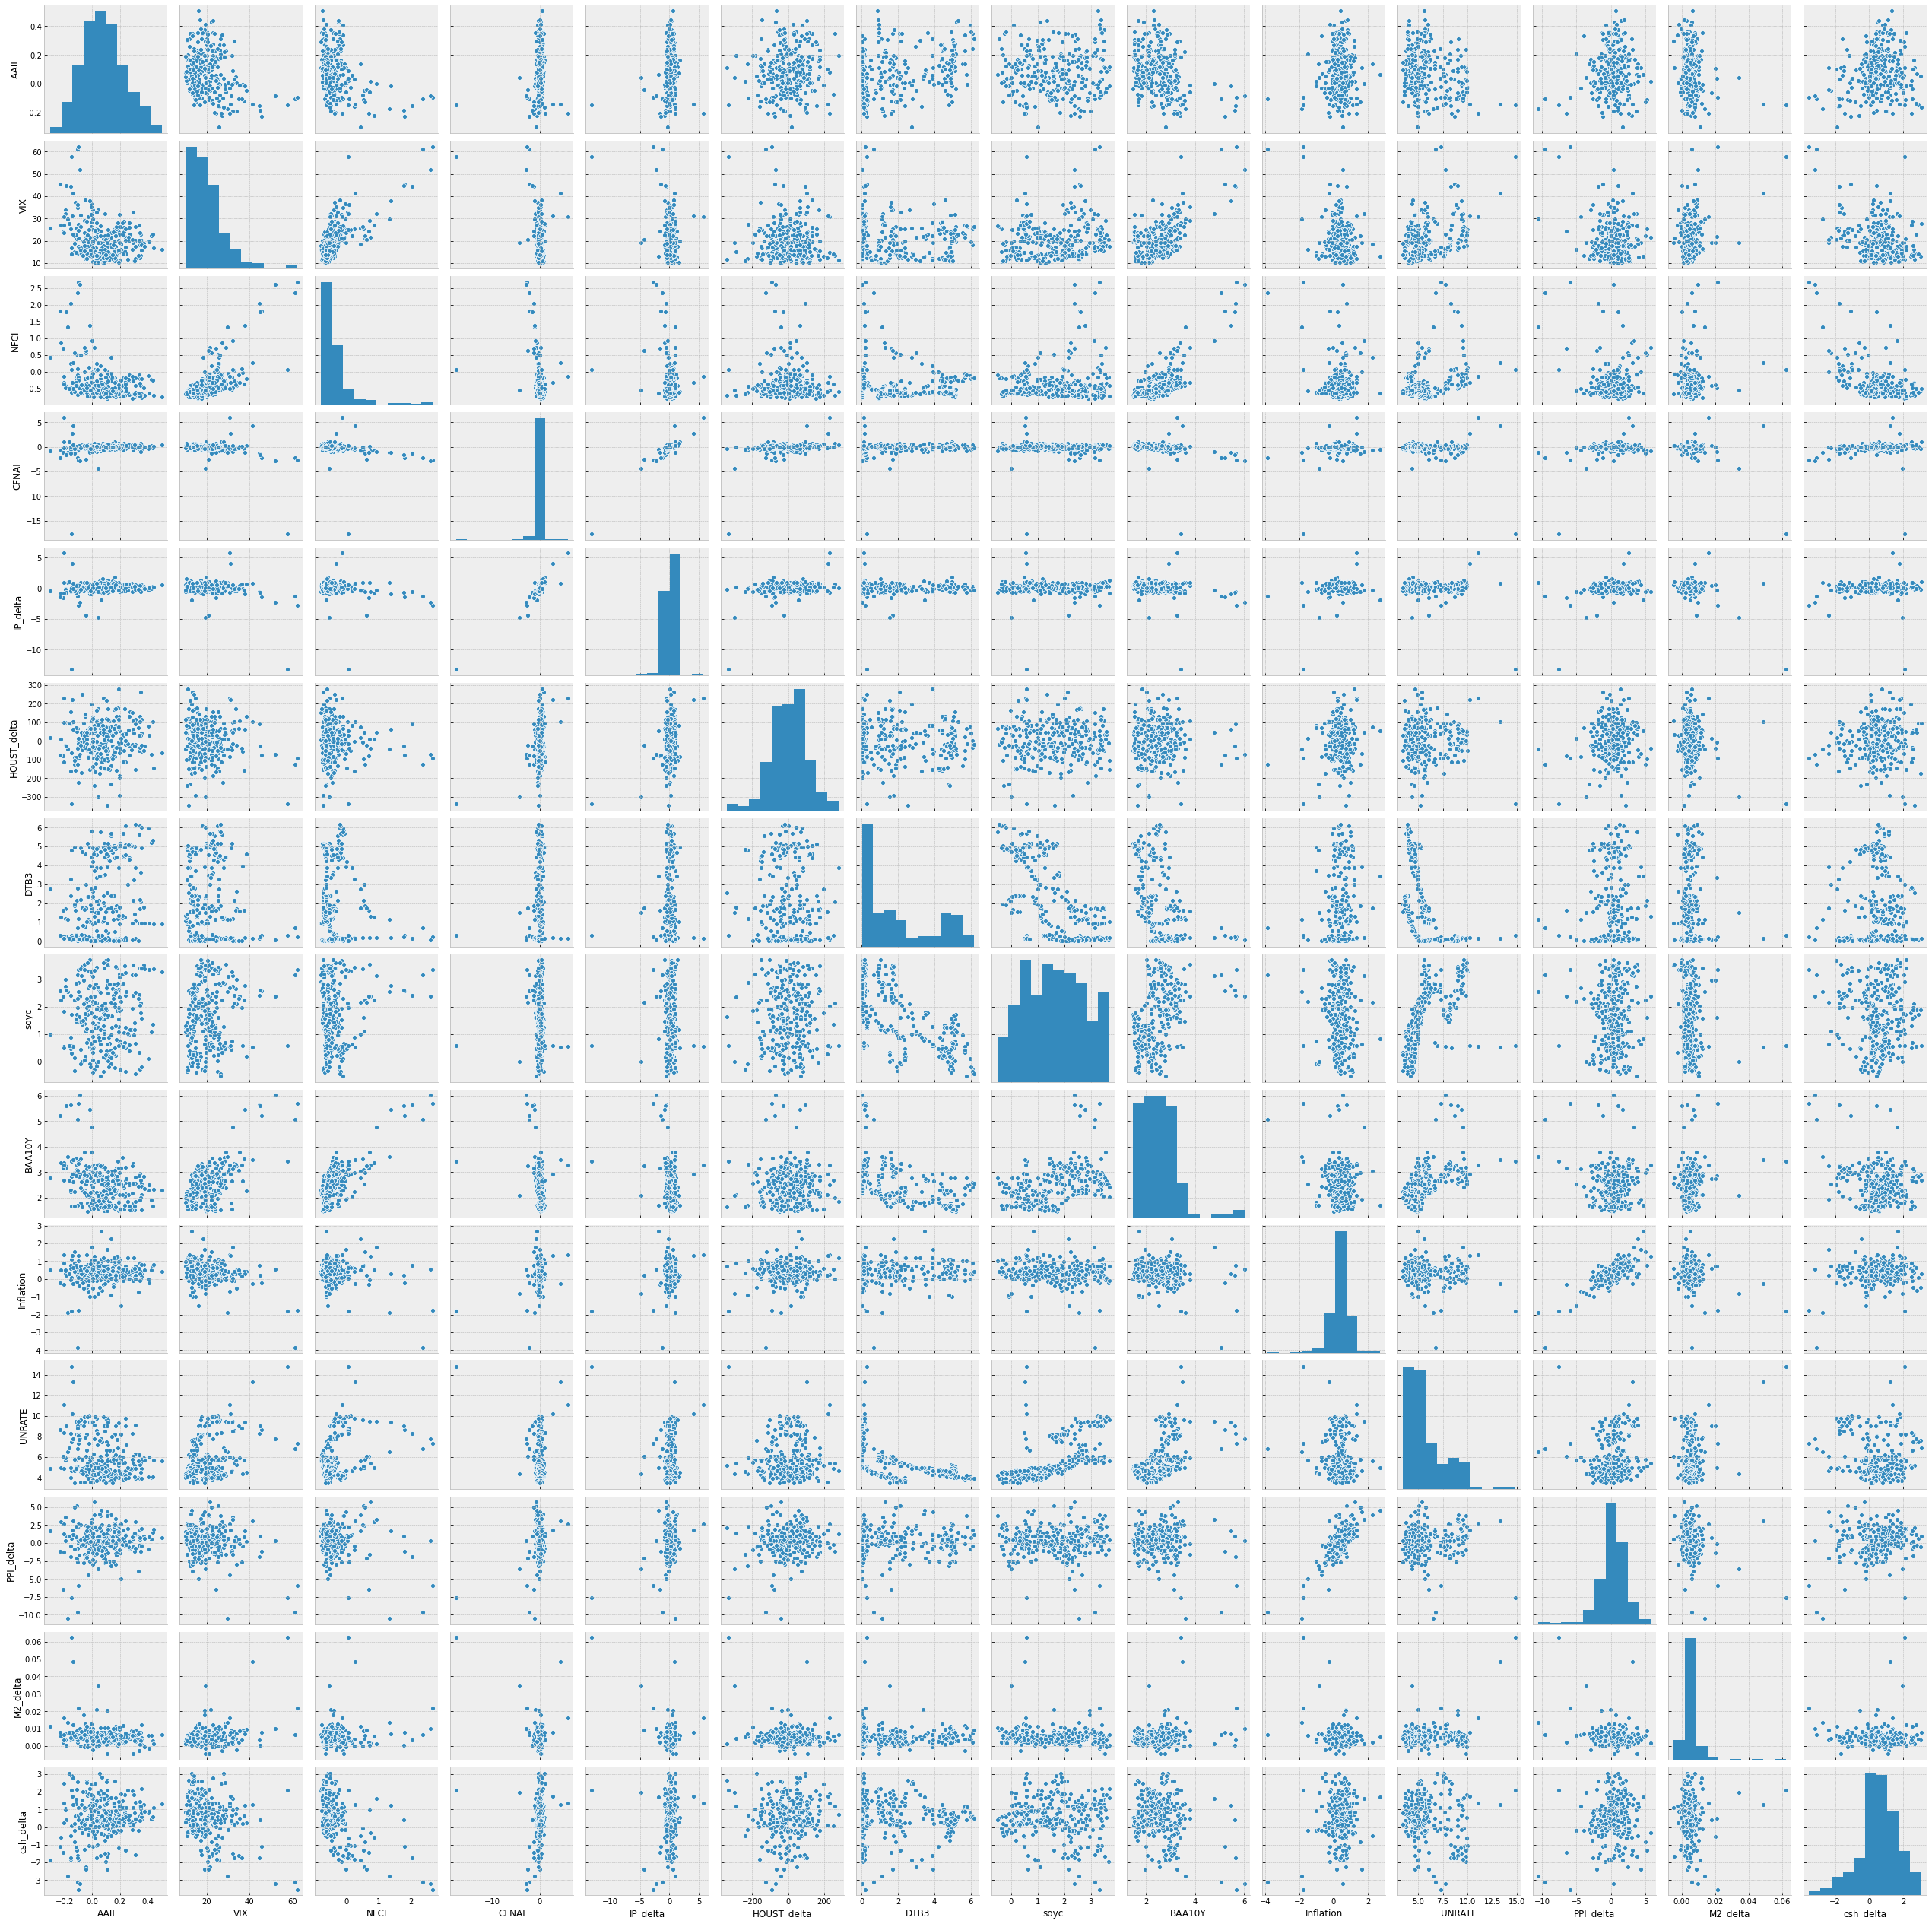

In [20]:
sns.pairplot(data)
plt.show()

In [21]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
AAII,287.0,0.079924,0.149695,-0.303180,-0.022874,0.075943,0.175100,0.504680
VIX,287.0,20.427285,8.270395,10.125455,14.255238,19.171304,24.136851,62.253500
NFCI,287.0,-0.360318,0.513001,-0.803402,-0.638393,-0.508993,-0.275067,2.674955
CFNAI,287.0,-0.102718,1.280187,-17.730000,-0.285000,-0.010000,0.250000,5.960000
IP_delta,287.0,0.087308,1.128163,-13.256300,-0.244800,0.143300,0.542450,5.740600
HOUST_delta,287.0,0.724739,99.735406,-343.000000,-58.000000,-3.000000,65.000000,279.000000
DTB3,287.0,2.000101,1.973045,0.011429,0.133303,1.413333,3.930487,6.171905
soyc,287.0,1.644118,1.107544,-0.528500,0.652750,1.617895,2.535152,3.692000
BAA10Y,287.0,2.528916,0.748258,1.451364,2.009516,2.496364,2.910000,6.008696
Inflation,287.0,0.354798,0.594170,-3.842000,0.100000,0.390000,0.652000,2.700000


In [22]:
df = pd.DataFrame(data = {'Min.': data.min(),
                         'Max.': data.max(),
                         'Mean': data.mean(),
                         'Median': data.median(),
                         'Sd.': data.std(),
                         'Skew.': data.skew(),
                         'Kurt': data.kurt()})

In [23]:
df.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/data_table.csv')

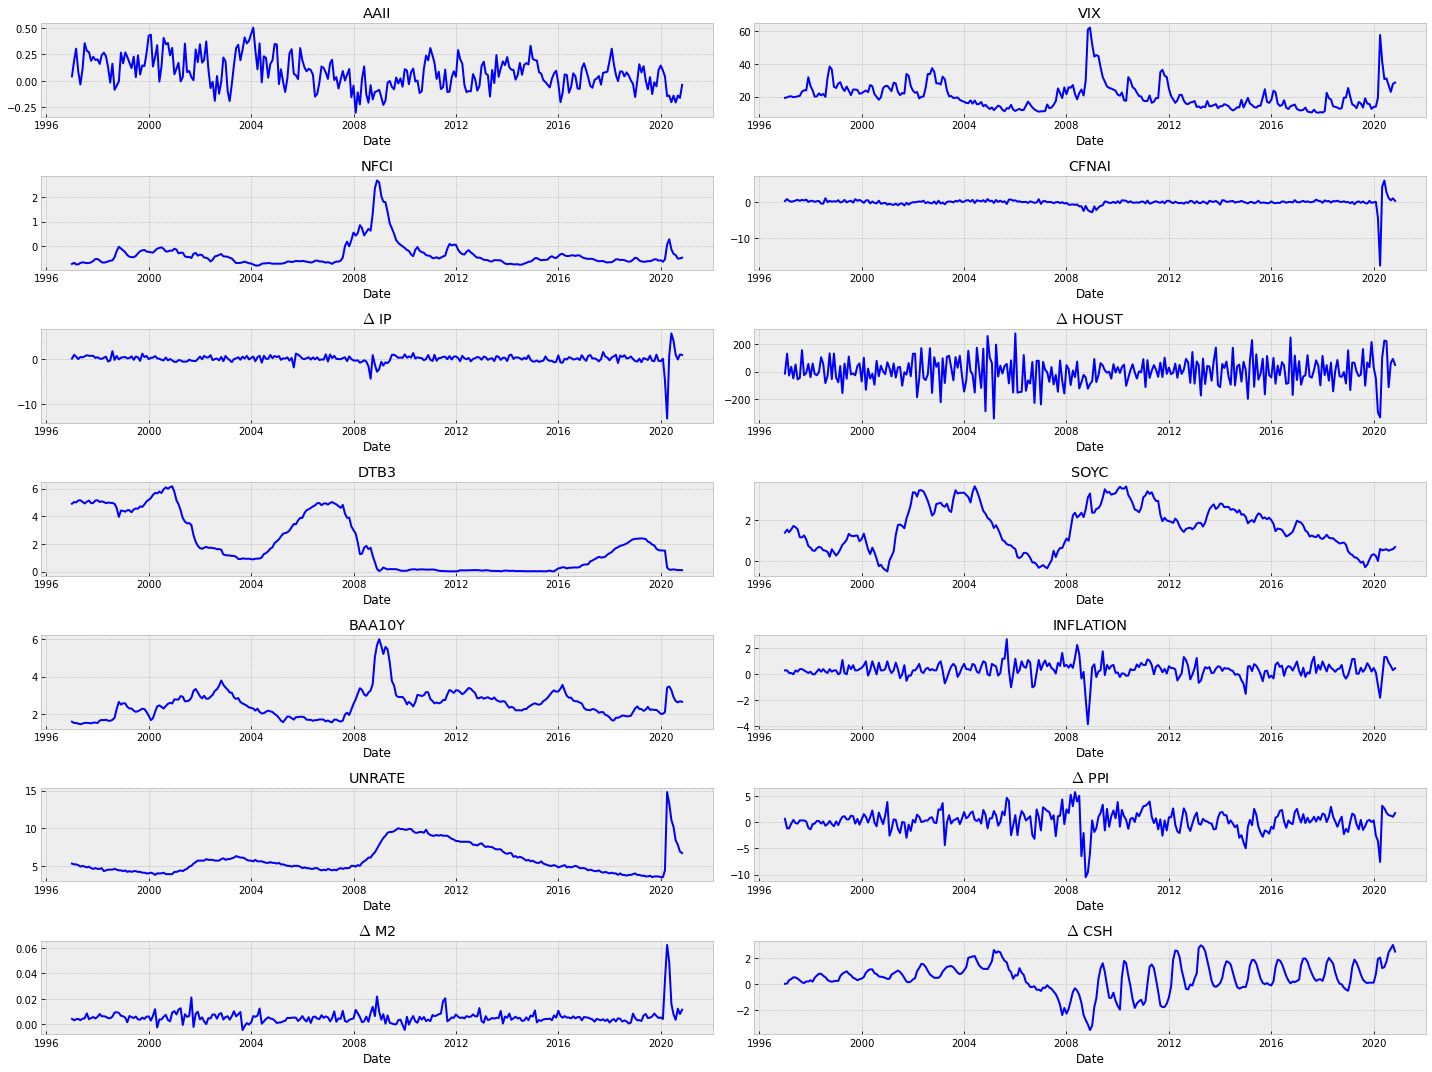

In [25]:
from matplotlib import gridspec
valtozok = ['AAII', 'VIX', 'NFCI', 'CFNAI', r'$\Delta$ IP', r'$\Delta$ HOUST', 'DTB3', 'SOYC', 'BAA10Y', 'INFLATION', 'UNRATE', r'$\Delta$ PPI', r'$\Delta$ M2', r'$\Delta$ CSH']

fig, axs = plt.subplots(7,2, figsize = (20,15))

sns.lineplot(ax = axs[0][0], x = data.index, y = data.iloc[:, 0].values, color = 'b')
axs[0][0].set_title('{}'.format(valtozok[0]))
axs[0][0].set_xlabel('Date')

sns.lineplot(ax = axs[0][1], x = data.index, y = data.iloc[:, 1].values, color = 'b')
axs[0][1].set_title('{}'.format(valtozok[1]))
axs[0][1].set_xlabel('Date')

sns.lineplot(ax = axs[1][0], x = data.index, y = data.iloc[:, 2].values, color = 'b')
axs[1][0].set_title('{}'.format(valtozok[2]))
axs[1][0].set_xlabel('Date')

sns.lineplot(ax = axs[1][1], x = data.index, y = data.iloc[:, 3].values, color = 'b')
axs[1][1].set_title('{}'.format(valtozok[3]))
axs[1][1].set_xlabel('Date')

sns.lineplot(ax = axs[2][0], x = data.index, y = data.iloc[:, 4].values, color = 'b')
axs[2][0].set_title('{}'.format(valtozok[4]))
axs[2][0].set_xlabel('Date')

sns.lineplot(ax = axs[2][1], x = data.index, y = data.iloc[:, 5].values, color = 'b')
axs[2][1].set_title('{}'.format(valtozok[5]))
axs[2][1].set_xlabel('Date')

sns.lineplot(ax = axs[3][0], x = data.index, y = data.iloc[:, 6].values, color = 'b')
axs[3][0].set_title('{}'.format(valtozok[6]))
axs[3][0].set_xlabel('Date')

sns.lineplot(ax = axs[3][1], x = data.index, y = data.iloc[:, 7].values, color = 'b')
axs[3][1].set_title('{}'.format(valtozok[7]))
axs[3][1].set_xlabel('Date')

sns.lineplot(ax = axs[4][0], x = data.index, y = data.iloc[:, 8].values, color = 'b')
axs[4][0].set_title('{}'.format(valtozok[8]))
axs[4][0].set_xlabel('Date')

sns.lineplot(ax = axs[4][1], x = data.index, y = data.iloc[:, 9].values, color = 'b')
axs[4][1].set_title('{}'.format(valtozok[9]))
axs[4][1].set_xlabel('Date')

sns.lineplot(ax = axs[5][0], x = data.index, y = data.iloc[:, 10].values, color = 'b')
axs[5][0].set_title('{}'.format(valtozok[10]))
axs[5][0].set_xlabel('Date')

sns.lineplot(ax = axs[5][1], x = data.index, y = data.iloc[:, 11].values, color = 'b')
axs[5][1].set_title('{}'.format(valtozok[11]))
axs[5][1].set_xlabel('Date')

sns.lineplot(ax = axs[6][0], x = data.index, y = data.iloc[:, 12].values, color = 'b')
axs[6][0].set_title('{}'.format(valtozok[12]))
axs[6][0].set_xlabel('Date')

sns.lineplot(ax = axs[6][1], x = data.index, y = data.iloc[:, 13].values, color = 'b')
axs[6][1].set_title('{}'.format(valtozok[13]))
axs[6][1].set_xlabel('Date')

plt.tight_layout()
plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/macros_plot.png')
plt.show()